In [50]:
import os
import numpy as np
import librosa
import librosa.display
from glob import glob
import matplotlib.pyplot as plt
import IPython.display as ipd
import soundfile as sf

In [38]:
sr = 16000
hop_size = 128
n_fft = 256

In [39]:
sample_paths = glob('experiments/sr_musdb_220608_130550/results/23/*.npy')
sample_paths

['experiments/sr_musdb_220608_130550/results/23/150001_2_sr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_3_sr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_2_lr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_1_sr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_2_hr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_1_hr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_1_inf.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_1_lr.npy',
 'experiments/sr_musdb_220608_130550/results/23/150001_2_inf.npy']

In [57]:
os.path.basename(sample_paths[0])

'150001_2_sr.npy'

In [40]:
hr = np.load("experiments/sr_musdb_220608_130550/results/23/150001_2_hr.npy")
hr_inv = librosa.griffinlim(hr)

S = np.load(sample_paths[0])
# Invert using Griffin-Lim
y_inv = librosa.griffinlim(S)
# Invert without estimating phase
y_istft = librosa.istft(S)

In [43]:
y_inv.shape

(24000,)

Text(0.5, 1.0, 'Magnitude-only istft reconstruction')

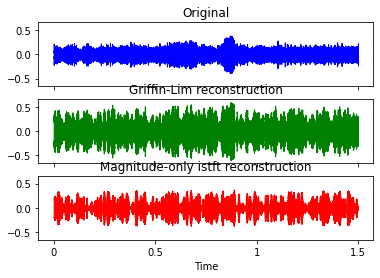

In [45]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)
librosa.display.waveshow(hr_inv, sr=sr, color='b', ax=ax[0])
ax[0].set(title='Original', xlabel=None)
ax[0].label_outer()
librosa.display.waveshow(y_inv, sr=sr, color='g', ax=ax[1])
ax[1].set(title='Griffin-Lim reconstruction', xlabel=None)
ax[1].label_outer()
librosa.display.waveshow(y_istft, sr=sr, color='r', ax=ax[2])
ax[2].set_title('Magnitude-only istft reconstruction')

In [51]:
sf.write('test.wav', y_inv, sr)

In [49]:
ipd.Audio(hr_inv, rate=sr)

In [59]:
for path in sample_paths:
    data = np.load(path)
    output = librosa.griffinlim(data)
    sf.write(f"{os.path.basename(path).replace('npy', 'wav')}", output, sr)